Enrichmen and Aggregation Script


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#### Fetching the Cleaned data for enrichment and aggregation

cleaned_df = pd.read_csv("../data/processed/clean_sales.csv", index_col="Transaction ID", parse_dates = ["Transaction Date"])

In [8]:
cleaned_df.head(10)

,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
Transaction ID,,,,,,,,,,
TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,1
TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,1
TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,0
TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,0
TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,0
TXN_3652209,CUST_07,Food,Item_1_FOOD,5.0,8.0,40.0,Credit Card,In-store,2023-06-10,1
TXN_9728486,CUST_23,Furniture,Item_16_FUR,27.5,1.0,27.5,Credit Card,In-store,2023-04-26,0
TXN_2722661,CUST_25,Butchers,Item_22_BUT,36.5,3.0,109.5,Cash,Online,2024-03-14,0
TXN_8776416,CUST_22,Butchers,Item_3_BUT,8.0,9.0,72.0,Cash,In-store,2024-12-14,1


In [9]:
#### Check the column details

cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11362 entries, TXN_6867343 to TXN_2407494
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Customer ID       11362 non-null  object        
 1   Category          11362 non-null  object        
 2   Item              11362 non-null  object        
 3   Price Per Unit    11362 non-null  float64       
 4   Quantity          11362 non-null  float64       
 5   Total Spent       11362 non-null  float64       
 6   Payment Method    11362 non-null  object        
 7   Location          11362 non-null  object        
 8   Transaction Date  11362 non-null  datetime64[ns]
 9   Discount Applied  11362 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 976.4+ KB


Enrichment Activities

In [10]:
#### Create Year, Month and Month Name column

cleaned_df["Year"] = cleaned_df["Transaction Date"].dt.year
cleaned_df["Month"] = cleaned_df["Transaction Date"].dt.month
cleaned_df["Month Name"] = cleaned_df["Transaction Date"].dt.month_name()

In [11]:
cleaned_df.head(10)

,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Year,Month,Month Name
Transaction ID,,,,,,,,,,,,,
TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,1,2024,4,April
TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,1,2023,7,July
TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,0,2022,10,October
TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,0,2022,5,May
TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,0,2022,10,October
TXN_3652209,CUST_07,Food,Item_1_FOOD,5.0,8.0,40.0,Credit Card,In-store,2023-06-10,1,2023,6,June
TXN_9728486,CUST_23,Furniture,Item_16_FUR,27.5,1.0,27.5,Credit Card,In-store,2023-04-26,0,2023,4,April
TXN_2722661,CUST_25,Butchers,Item_22_BUT,36.5,3.0,109.5,Cash,Online,2024-03-14,0,2024,3,March
TXN_8776416,CUST_22,Butchers,Item_3_BUT,8.0,9.0,72.0,Cash,In-store,2024-12-14,1,2024,12,December


In [12]:
#### Create Fiscal year.

cleaned_df["Fiscal Year"] = cleaned_df["Transaction Date"].dt.year.where(
            cleaned_df['Transaction Date'].dt.month >= 4,
            cleaned_df['Transaction Date'].dt.year - 1
                    )

In [13]:
cleaned_df.head(10)

,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Year,Month,Month Name,Fiscal Year
Transaction ID,,,,,,,,,,,,,,
TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,1,2024,4,April,2024
TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,1,2023,7,July,2023
TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,0,2022,10,October,2022
TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,0,2022,5,May,2022
TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,0,2022,10,October,2022
TXN_3652209,CUST_07,Food,Item_1_FOOD,5.0,8.0,40.0,Credit Card,In-store,2023-06-10,1,2023,6,June,2023
TXN_9728486,CUST_23,Furniture,Item_16_FUR,27.5,1.0,27.5,Credit Card,In-store,2023-04-26,0,2023,4,April,2023
TXN_2722661,CUST_25,Butchers,Item_22_BUT,36.5,3.0,109.5,Cash,Online,2024-03-14,0,2024,3,March,2023
TXN_8776416,CUST_22,Butchers,Item_3_BUT,8.0,9.0,72.0,Cash,In-store,2024-12-14,1,2024,12,December,2024


Aggregation Operation

In [18]:
### Fetch Total Sales by Year and Category
year_category_sales = cleaned_df.groupby(["Year", "Category"])["Total Spent"].sum().reset_index()

In [20]:
year_category_sales.to_csv("../data/processed/year_category_sales.csv", index=False)

In [21]:
#### Provide total spent by Fiscal Year and Category.
#### Fiscal Year column will act as Index. Use reset_index() to remove them.
fiscal_category_sales = cleaned_df.groupby(["Fiscal Year","Category"])["Total Spent"].sum().reset_index()

fiscal_category_sales.to_csv("../data/processed/fiscal_category_sales.csv", index=False)

In [22]:
### Month wise category sales
month_category_sales = (
    cleaned_df.groupby(["Year", "Month", "Month Name", "Category"])["Total Spent"]
      .sum()
      .reset_index()
)


In [23]:
month_category_sales.to_csv("../data/processed/month_category_sales.csv", index=False)


In [25]:
#### Discount vs No Discount Sales
discount_sales = cleaned_df.groupby(["Discount Applied"])["Total Spent"].sum().reset_index()

In [27]:
discount_sales.head()

discount_sales["Discount Applied"] = discount_sales["Discount Applied"].map({
    1: "Discount",
    0: "No Discount"
})

In [28]:
discount_sales

,Discount Applied,Total Spent
0,No Discount,976118.0
1,Discount,496880.5


In [29]:
discount_sales.to_csv("../data/processed/discount_sales.csv", index=False)

In [31]:
### Median Price by Fiscal Year and category 

median_price = cleaned_df.groupby(["Fiscal Year","Category"])["Price Per Unit"].median().reset_index()

In [32]:
median_price.to_csv("../data/processed/median_price_by_year_category.csv", index=False)

Validation Plots

In [59]:
cleaned_df["YearMonth"] = cleaned_df["Transaction Date"].dt.to_period("M").dt.to_timestamp()

In [60]:
cleaned_df["YearMonth"]

Transaction ID
TXN_6867343   2024-04-01
TXN_3731986   2023-07-01
TXN_9303719   2022-10-01
TXN_9458126   2022-05-01
TXN_4575373   2022-10-01
                 ...    
TXN_9347481   2023-09-01
TXN_4009414   2022-08-01
TXN_5306010   2024-08-01
TXN_5167298   2023-12-01
TXN_2407494   2022-08-01
Name: YearMonth, Length: 11362, dtype: datetime64[ns]

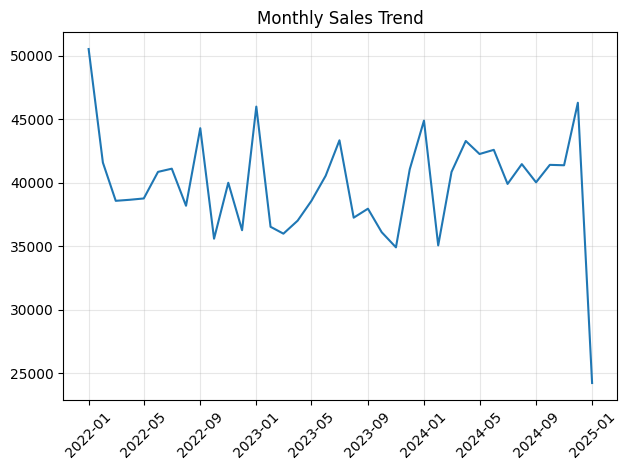

In [64]:
monthly = cleaned_df.groupby("YearMonth")["Total Spent"].sum().reset_index()
monthly = monthly.sort_values("YearMonth")

plt.plot(monthly["YearMonth"], monthly["Total Spent"])
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

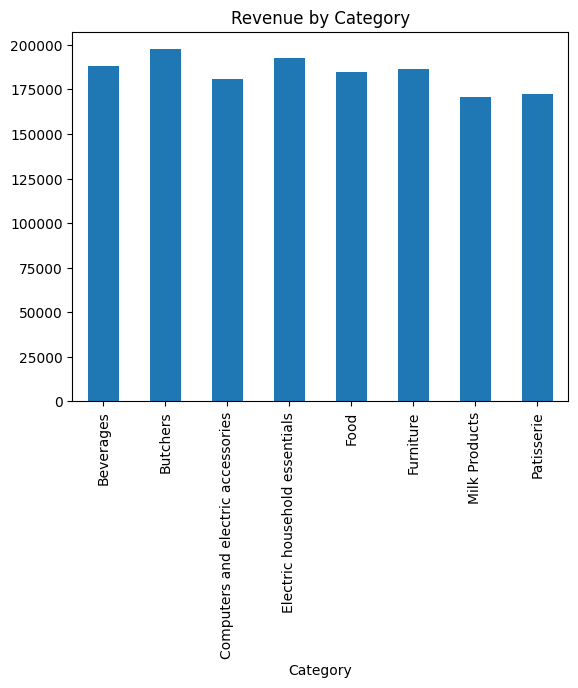

In [65]:
# category wise revenue

cat = cleaned_df.groupby("Category")["Total Spent"].sum()

cat.plot(kind="bar", title="Revenue by Category")
plt.show()

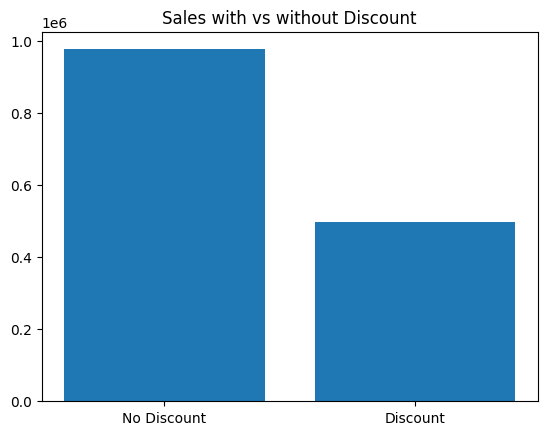

In [66]:
plt.bar(discount_sales["Discount Applied"], discount_sales["Total Spent"])
plt.title("Sales with vs without Discount")
plt.show()


In [67]:
### Create an Pivot to showcase category, total spent with Year as stacked bar.

pivot_df =  cleaned_df.pivot_table(
        index = "Category",
        columns = "Year",
        values = "Total Spent",
        aggfunc = 'sum'
)

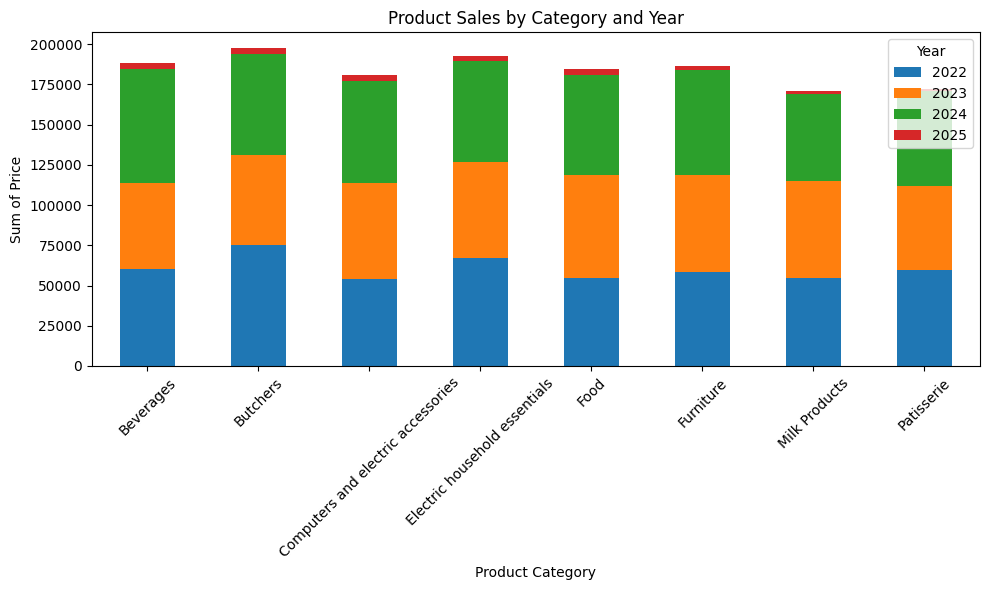

In [68]:
pivot_df.plot(kind="bar", stacked=True, figsize=(10,6))

plt.title("Product Sales by Category and Year")
plt.xlabel("Product Category")
plt.ylabel("Sum of Price")
plt.legend(title = "Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()